## File descriptions

train.csv - the training set

test.csv - the test set

data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the 
column names used here

sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import xgboost as xgb

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('train.csv',index_col="Id")
test_df=pd.read_csv('test.csv',index_col="Id")

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 80)

In [5]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### Checking the missing values in the train and test datasets and plotting them to better visualize our data

In [7]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

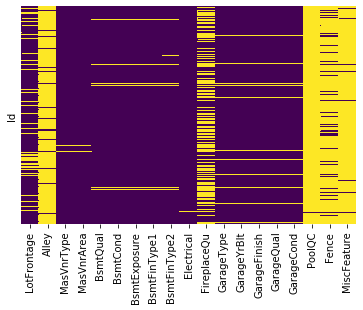

In [8]:
MissingV=df.columns[df.isna().any()].tolist()
sns.heatmap(df[MissingV].isnull(),yticklabels=False,cbar=False,cmap='viridis')

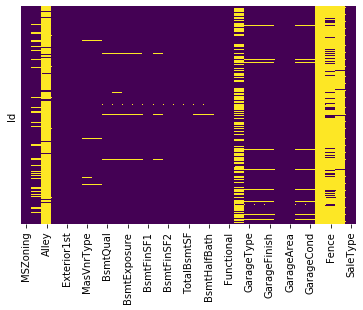

In [9]:
TMissingV=test_df.columns[test_df.isna().any()].tolist()
sns.heatmap(test_df[TMissingV].isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Separating the categorical and numerical columns

In [10]:
Categorical_cols=df.select_dtypes(include=['object']).columns
Numerical_cols=df.select_dtypes(exclude=['object']).columns

In [11]:
print('numerical columns:{0}'.format(len(Numerical_cols)))
Numerical_cols

numerical columns:37


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
print('categorical columns:{0}'.format(len(Categorical_cols)))
Categorical_cols

categorical columns:43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
df[Numerical_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
df[Categorical_cols].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


## 1.2 Exploring numberical variables
.Find out low correlated variable with SalePrice.We will not using them.

.Find out strong correlations which we will use for modeling. And look closer.
.Because outliers can influence heavily the correlation, we need to detect ouliers(distribution, scatter plot)       them remove these rows
 
.Find out missing value and find strategy(constant, mean, median) to fill

.Find strong corelated variables(similar feature). We can consider use one of them.

### Look at correations with SalePrice


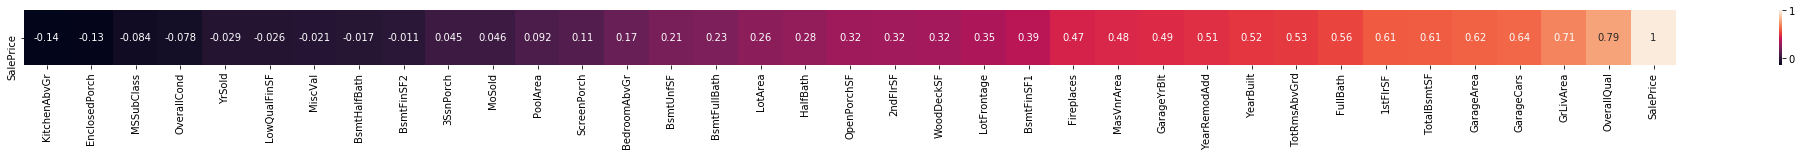

,KitchenAbvGr,EnclosedPorch,MSSubClass,OverallCond,YrSold,LowQualFinSF,MiscVal,BsmtHalfBath,BsmtFinSF2,3SsnPorch,MoSold,PoolArea,ScreenPorch,BedroomAbvGr,BsmtUnfSF,BsmtFullBath,LotArea,HalfBath,OpenPorchSF,2ndFlrSF,WoodDeckSF,LotFrontage,BsmtFinSF1,Fireplaces,MasVnrArea,GarageYrBlt,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
SalePrice,-0.135907,-0.128578,-0.084284,-0.077856,-0.028923,-0.025606,-0.02119,-0.016844,-0.011378,0.044584,0.046432,0.092404,0.111447,0.168213,0.214479,0.227122,0.263843,0.284108,0.315856,0.319334,0.324413,0.351799,0.38642,0.466929,0.477493,0.486362,0.507101,0.522897,0.533723,0.560664,0.605852,0.613581,0.623431,0.640409,0.708624,0.790982,1.0


In [15]:
fig= plt.figure(figsize=(37,1))
numerical_col_corr=df[Numerical_cols].corr().loc[['SalePrice'],:].sort_values(by='SalePrice',axis=1)
sns.heatmap(data=numerical_col_corr,annot=True)
plt.show()
numerical_col_corr

### Creating a theadhold to separate the weak and strong correlated features to our label "SalePrice"

In [16]:
corr_threadhold=0.2
weak_num_cols=list(numerical_col_corr[abs(numerical_col_corr)<corr_threadhold].dropna(axis=1))
print("there are {0} weakly correlated values corr<0.2 : {1}".format(len(weak_num_cols),weak_num_cols))

there are 14 weakly correlated values corr<0.2 : ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr']


In [17]:
strong_num_cols=list(numerical_col_corr[abs(numerical_col_corr)>corr_threadhold].dropna(axis=1))
print("there are {0} strongly correlated values corr<0.2 : {1}".format(len(strong_num_cols),strong_num_cols))

there are 23 strongly correlated values corr<0.2 : ['BsmtUnfSF', 'BsmtFullBath', 'LotArea', 'HalfBath', 'OpenPorchSF', '2ndFlrSF', 'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1', 'Fireplaces', 'MasVnrArea', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'SalePrice']


### count the missing values for the numerical features


In [18]:
numerical_null_count = df[Numerical_cols].isnull().sum()
print("Missing values: ")
print(numerical_null_count[numerical_null_count>0]) 

Missing values: 
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


### write functions to create scatter plot and destribution for each numerical variable


In [19]:
plt.rcParams.update({'font.size': 14})

def explore_variable(col_name):
    strong_crr_cols=find_high_correlated_variables(col_name)
    draw_variable([col_name]+strong_crr_cols)
    
    
def draw_variable(col_names):
    num_cols=len(col_names)
    fig=plt.figure(figsize=(8,num_cols*4))
    i=0
    for col in col_names:
        fig.add_subplot(num_cols,2,2*i+1)   
        sns.regplot(x=df[col],y=df['SalePrice'])
        plt.xlabel(col)
        plt.title('      correlation to SalePrice = {0}'.format(numerical_col_corr[col])) 
        fig.add_subplot(num_cols,2,2*i+2)  
        sns.distplot(df[col].dropna())
        #sns.distplot(df[col])
        plt.xlabel(col)
        i+= 1
    plt.tight_layout()

variable_corr=df[list(set(Numerical_cols)-set(['SalePrice']))].corr()
high_corr_threadhold=0.65


def find_high_correlated_variables(col_name):
    corr=variable_corr.loc[[col_name],:]
    strong_corr=corr[(abs(corr)>=high_corr_threadhold)&(corr<1)].dropna(axis=1)
    print('Strong correlated variables')
    print(strong_corr)
    return list(strong_corr.columns)

### OverallQual

 . good shape of distribution
 
 . no outliers
 
 . missing value can be filled by mean() or median()

Strong correlated variables
Empty DataFrame
Columns: []
Index: [OverallQual]


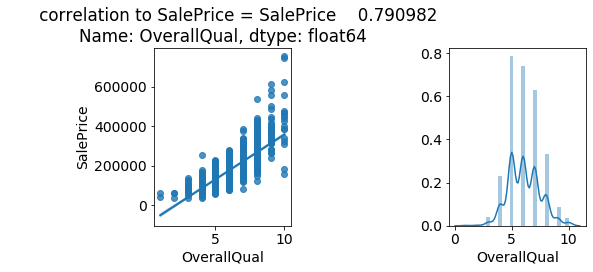

In [20]:
explore_variable('OverallQual')

### GrLivArea

.Slightly left skew distribution but still in good shape.

.2 outliers(> 4500)

.The missing values can be filled by median()

.Keep both GrLivArea and TotRmsAbvGrd and descard 2ndFlrSF

Strong correlated variables
           2ndFlrSF  TotRmsAbvGrd
GrLivArea  0.687501      0.825489


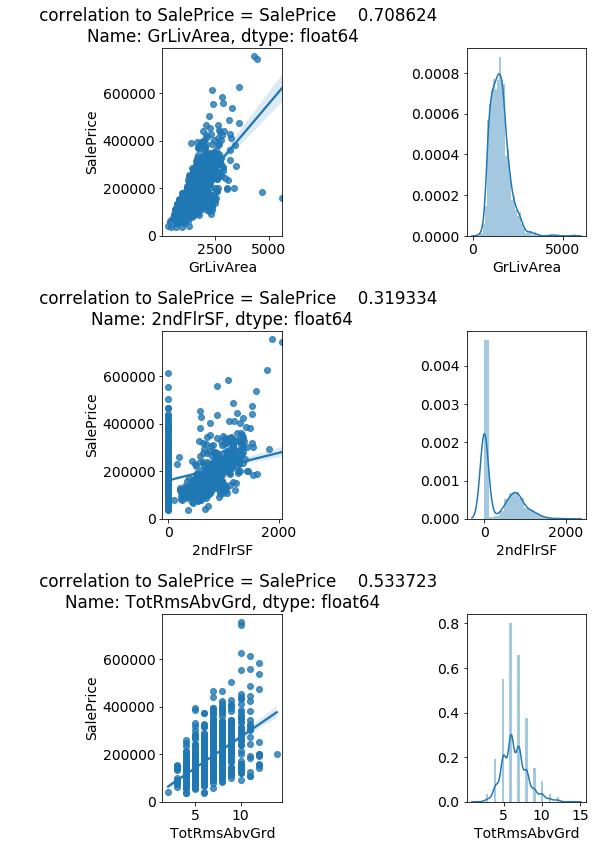

In [21]:
explore_variable('GrLivArea')

In [22]:
#check the mean()
df["GrLivArea"].describe()


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [23]:
#check the outliers
df["GrLivArea"].sort_values().tail()


Id
1170    3627
692     4316
1183    4476
524     4676
1299    5642
Name: GrLivArea, dtype: int64

### GarageCars

.Good shape of distribution 

.No outliers 

.Missing values can be filled with mean() or median()

.keep both GarageCars and GarageArea

Strong correlated variables
            GarageArea
GarageCars    0.882475


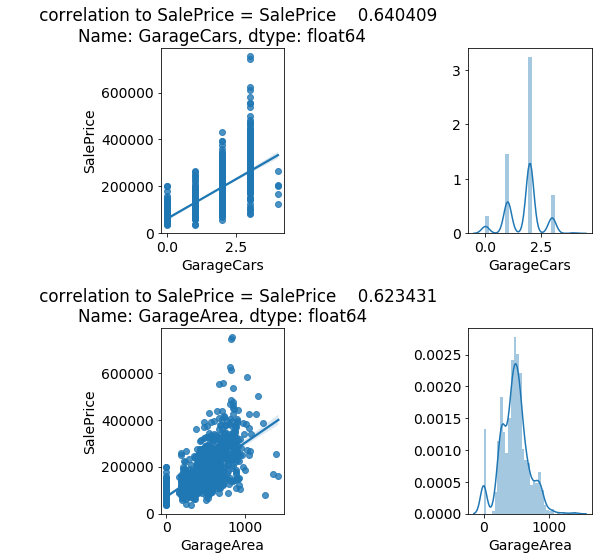

In [24]:
explore_variable("GarageCars")


### 1stFlrSF

.Left skew of distribution

.1 outlier (>5000)

.The missing value can be filled by median()

.We can remove strong related variable TotalBsmtSF


Strong correlated variables
          TotalBsmtSF
1stFlrSF      0.81953


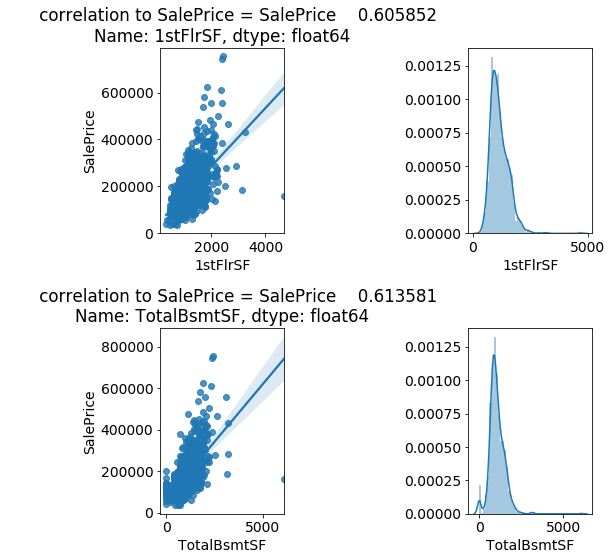

In [25]:
explore_variable("1stFlrSF")


### TotRmsAbvGrd

.Slightly left skew distribution

.No outlier

.The missing values can be filled by median()

.Keep both TotRmsAbvGrd and TotRmsAbvGrd and remoe bedroomsAbvGr


Strong correlated variables
              GrLivArea  BedroomAbvGr
TotRmsAbvGrd   0.825489       0.67662


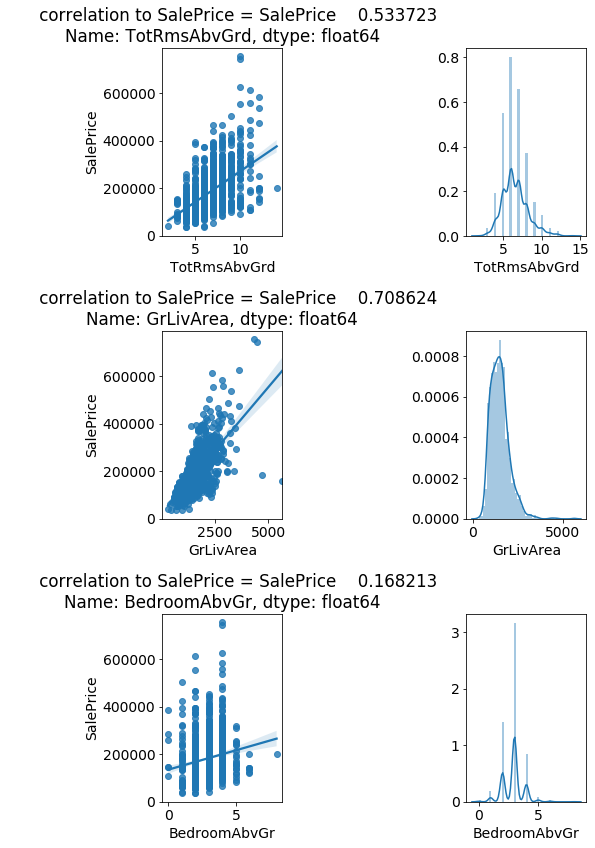

In [26]:
explore_variable("TotRmsAbvGrd")


### YearBuilt

.Right skew distribution

.No outlier

.This is basic infomation of a hourse, so the columns should not has     any missing values.

.We can remove strong related variable GarageYrBlt


Strong correlated variables
           GarageYrBlt
YearBuilt     0.825667


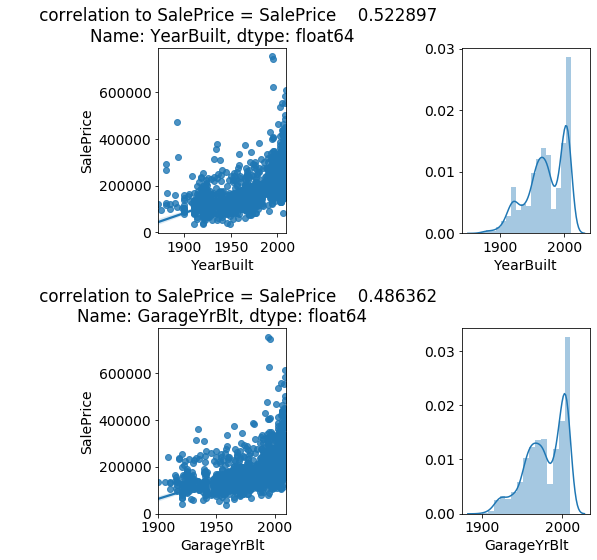

In [27]:
explore_variable("YearBuilt")


### YearRemodAdd

.At the first look, maybe some outlier where the price went too high.
However go back to OverallQual scatter plot, these house has 
OverallQual 10. It's resonable. -> No oulier

.Missing value should be fill by YearBuilt value. However, in both train and test dataset there is no null value of YearRemodAdd, so we don't need to fill this variavle.

Strong correlated variables
Empty DataFrame
Columns: []
Index: [YearRemodAdd]


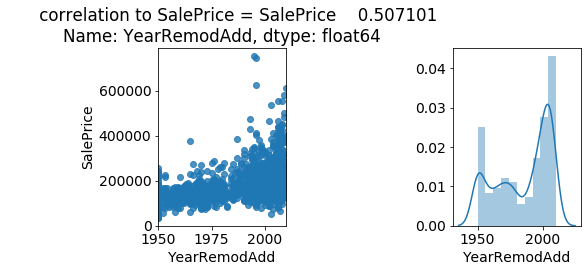

In [28]:
explore_variable("YearRemodAdd")

### MasVnrArea

Left skew distribution. Almost values = 0

No outlier

Missing value can be filled by 0

Strong correlated variables
Empty DataFrame
Columns: []
Index: [MasVnrArea]


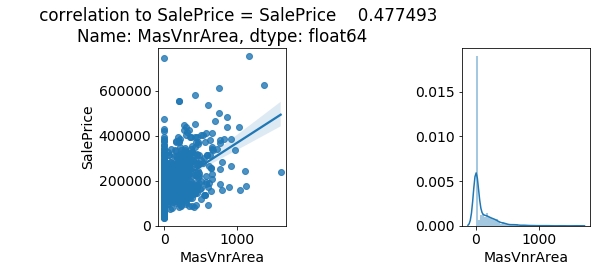

In [29]:
explore_variable("MasVnrArea")


### MasVnrArea

Left skew distribution. Almost values = 0

No outlier

Missing value can be filled by 0


Strong correlated variables
Empty DataFrame
Columns: []
Index: [Fireplaces]


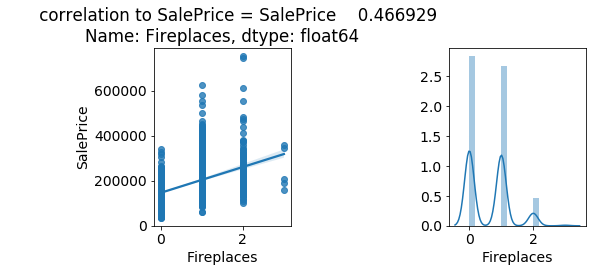

In [30]:
explore_variable("Fireplaces")


### BsmtFinSF1

Left skew distribution. Almost values are 0.

1 outlier(>4000)

Missing value can be filled by median() or 0

Strong correlated variables
Empty DataFrame
Columns: []
Index: [LotFrontage]


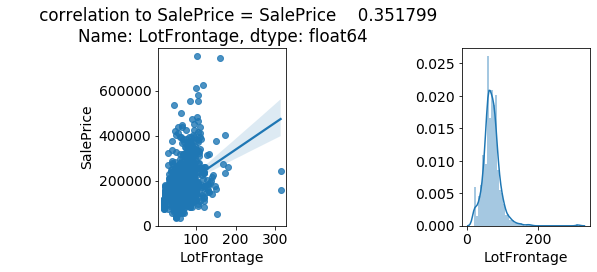

In [31]:
explore_variable("LotFrontage")


### WoodDeckSF

Left skew distribution. Almost values = 0

No outlier

Missing value can be filled by 0

Strong correlated variables
Empty DataFrame
Columns: []
Index: [WoodDeckSF]


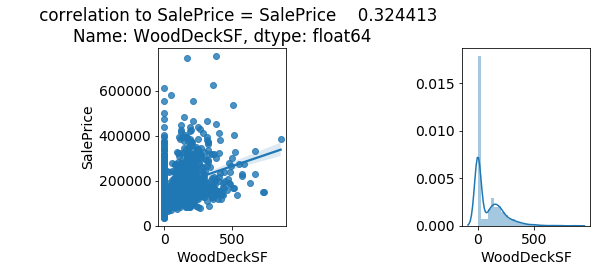

In [32]:
explore_variable("WoodDeckSF")


### 2ndFlrSF

Left skew distribution. Most values are 0

No outliers

Missing value can be filled by 0


Strong correlated variables
          GrLivArea
2ndFlrSF   0.687501


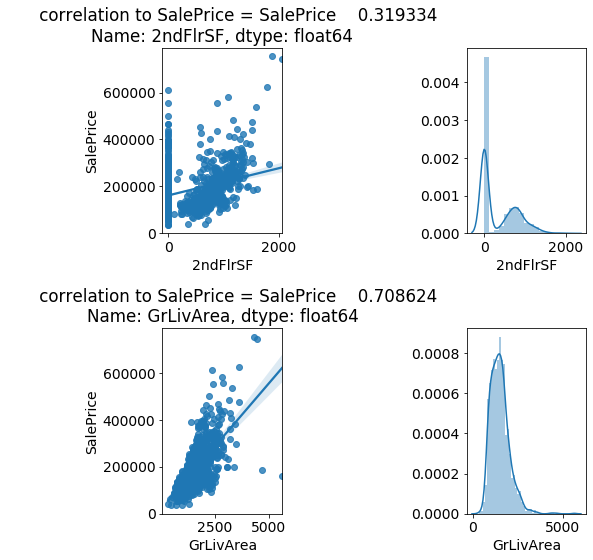

In [33]:
explore_variable("2ndFlrSF")


### OpenPorchSF 

Left skew distribution. Most values are 0

No outlier

Missing values can be filled by 0

Strong correlated variables
Empty DataFrame
Columns: []
Index: [OpenPorchSF]


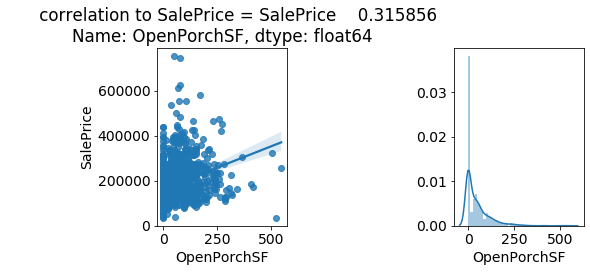

In [34]:
explore_variable("OpenPorchSF")


### HalfBath

No outlier

Missing value can be fill as 0( most frequent value)

Strong correlated variables
Empty DataFrame
Columns: []
Index: [HalfBath]


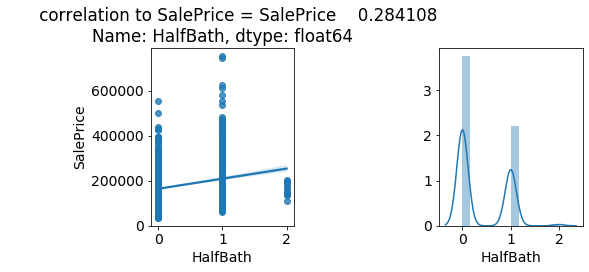

In [35]:
explore_variable("HalfBath")


### LotArea

Left skew distribution

No outlier

Missing values can be filled by median()

Strong correlated variables
Empty DataFrame
Columns: []
Index: [LotArea]


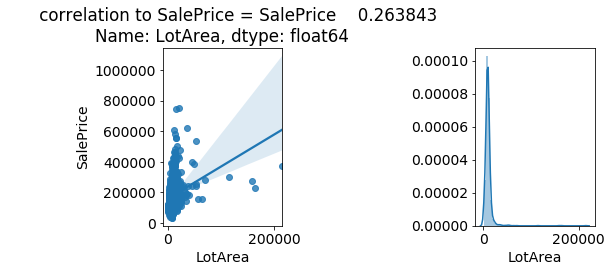

In [36]:
explore_variable("LotArea")


### BsmtFullBath

No outlier

Missing value can be filled by 0(most frequent value)

Strong correlated variables
Empty DataFrame
Columns: []
Index: [BsmtFullBath]


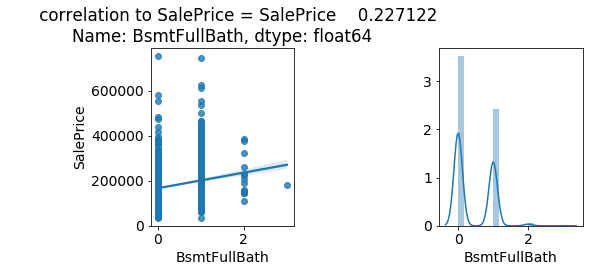

In [37]:
explore_variable("BsmtFullBath")


### BsmtUnfSF

Left skew distribution

No outlier

Missing values can be filled by median()

Strong correlated variables
Empty DataFrame
Columns: []
Index: [BsmtUnfSF]


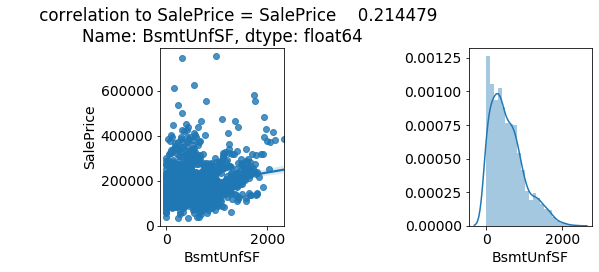

In [38]:
explore_variable("BsmtUnfSF")


## 1.3 Exploring categorical variables


As show bellow, by addition of KitchenQual, the price ranges are seperated quite clearly.

Basically, we will use all categorical columns and using One Hot Encoding but with large number of unique value we can consider to use LabelEncoder, CountEncoder, TargetEncoder or CatBoostEncoder.

We also need to remove un-useful columns, which has large number of missing values.

<Figure size 432x864 with 0 Axes>

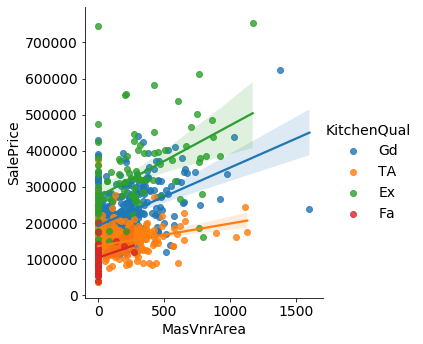

In [39]:
fig = plt.figure(figsize=(6,12))
sns.lmplot(x="MasVnrArea", y="SalePrice", hue="KitchenQual", data=df) 

<Figure size 432x864 with 0 Axes>

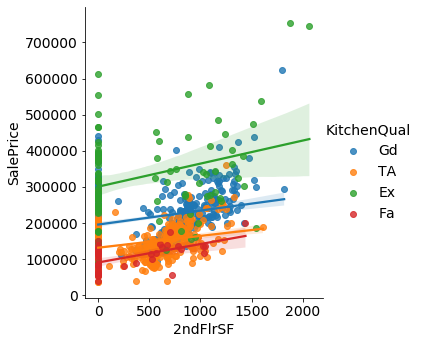

In [40]:
fig = plt.figure(figsize=(6,12))
sns.lmplot(x="2ndFlrSF", y="SalePrice", hue="KitchenQual", data=df) 

The number of unique values each variable are show as bellow. Not much of variable so we will apply One Hot Encoding for all categorical variables.

In [41]:
unique_val_num_dict = {col:len(df[col].unique())  for col in Categorical_cols}
sorted(unique_val_num_dict.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('Alley', 3),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('GarageFinish', 4),
 ('PoolQC', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('MasVnrType', 5),
 ('ExterCond', 5),
 ('BsmtQual', 5),
 ('BsmtCond', 5),
 ('BsmtExposure', 5),
 ('HeatingQC', 5),
 ('Fence', 5),
 ('MiscFeature', 5),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Electrical', 6),
 ('FireplaceQu', 6),
 ('GarageQual', 6),
 ('GarageCond', 6),
 ('SaleCondition', 6),
 ('BsmtFinType1', 7),
 ('BsmtFinType2', 7),
 ('Functional', 7),
 ('GarageType', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('RoofMatl', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

Bellow is the number of null values.

We will drop Alley, PoolQC, Fence, MiscFeature.

The other missing values will be fill up by SimpleImputer-most_frequent value

In [42]:
null_count = df[Categorical_cols].isnull().sum()
null_count[null_count>0].dropna(axis=0)

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Data Cleaning

### Replacing null values for numerical features in the train data

In [43]:
# df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
# df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
# df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

### Replacing null values for numerical features in the test data


In [44]:
# test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
# test_df['GarageYrBlt']=test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())
# test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
# test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean())
# test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mean())
# test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
# test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
# test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
# test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
# test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
# test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())

### Replacing categorical features in the train data

In [45]:
# df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
# df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
# df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
# df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
# df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
# df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
# df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
# df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
# df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
# df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
# df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

### Replacing categorical features in the test data

In [46]:
# test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
# test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
# test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
# test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
# test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
# test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
# test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
# test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
# test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
# test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
# test_df['Electrical']=test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])
# test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
# test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
# test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
# test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
# test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
# test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

### Dropping the features with too many null values from the training data

In [47]:
#df.drop(['Id','Fence','FireplaceQu','MiscFeature','PoolQC','Alley','MSZoning'],axis=1,inplace=True)

### Dropping the features with too many null values from the test data

In [48]:
#test_df.drop(['Id','Fence','FireplaceQu','MiscFeature','PoolQC','Alley','MSZoning'],axis=1,inplace=True)

### Numerical columns
Drop columns:

 Have strong corelated with other variables:
 
  ['TotalBsmtSF', 'GarageYrBlt']
  
 Weak corelation with SalePrice:
 
  ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr']
  
  
Fill missing values
 by zero:
 
 ['MasVnrArea', 'Fireplaces', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',  'HalfBath', 'BsmtFullBath']
 
by median:

 ['OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'TotRmsAbvGrd', 'BsmtFinSF1', 'LotFrontage', 'LotArea', 'BsmtUnfSF']
 
Remove Outliers:

 GrLivArea 2 outliers(> 4500)
 
 1stFlrSF 1 outlier (>5000)
 
 BsmtFinSF1 1 outlier(>4000)
 
 LotFrontage 2 outliers( >300) ## Numberical columns

### Categorical columns

Drop columns:

 ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
 
 Replace the null values with the most frequent values.

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [50]:
zero_transformer = SimpleImputer(strategy='constant', fill_value=0)

median_transformer = SimpleImputer(strategy='median')

categorical_transformer = SimpleImputer(strategy='most_frequent')


In [51]:
drop_cols =  ['Alley', 'PoolQC', 'Fence', 'MiscFeature'] +['TotalBsmtSF', 'GarageYrBlt'] +['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond',
 'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
 '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr']

zero_fill_cols  = ['MasVnrArea', 'Fireplaces', 'WoodDeckSF',
                   '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
                   'BsmtFullBath']

median_fill_cols =  ['OverallQual', 'GrLivArea', 'GarageCars',
                     '1stFlrSF', 'TotRmsAbvGrd', 'BsmtFinSF1',
                     'LotFrontage', 'LotArea', 'BsmtUnfSF','GarageArea']
categorical_col=list(set(Categorical_cols) - set(['Alley', 'PoolQC', 'Fence', 'MiscFeature']))

In [52]:
# preprocessor = ColumnTransformer(
#                 transformers=[
#                     ('num_zero', zero_transformer, zero_fill_cols),
#                     ('median_zero', median_transformer, median_fill_cols),
#                     ('cat', categorical_transformer, categorical_col)
#                 ])

In [53]:
train_data = df.copy()
train_data.drop(drop_cols, axis=1, inplace=True)
train_data.drop(train_data[(train_data['GrLivArea'] > 4500) |
                (train_data['1stFlrSF'] > 5000) |
                (train_data['BsmtFinSF1'] > 4000) |
                (train_data['LotFrontage'] > 300)].index
                ,axis=0, inplace=True)

### Fit the imputed values and transform our train dataset

In [54]:
zero_transformer.fit(train_data[zero_fill_cols])
train_data.loc[:,zero_fill_cols]=zero_transformer.transform(train_data[zero_fill_cols])

In [55]:
median_transformer.fit(train_data[median_fill_cols])
train_data.loc[:,median_fill_cols]=median_transformer.transform(train_data[median_fill_cols])

In [56]:
categorical_transformer.fit(train_data[categorical_col])
train_data.loc[:,categorical_col]=categorical_transformer.transform(train_data[categorical_col])

In [57]:
train_data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,GasA,Ex,Y,SBrkr,856.0,854.0,1710.0,1.0,2,1.0,Gd,8.0,Typ,0.0,Gd,Attchd,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,WD,Normal,208500
2,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,GasA,Ex,Y,SBrkr,1262.0,0.0,1262.0,0.0,2,0.0,TA,6.0,Typ,1.0,TA,Attchd,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,WD,Normal,181500
3,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,GasA,Ex,Y,SBrkr,920.0,866.0,1786.0,1.0,2,1.0,Gd,6.0,Typ,1.0,TA,Attchd,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,WD,Normal,223500
4,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,GasA,Gd,Y,SBrkr,961.0,756.0,1717.0,1.0,1,0.0,Gd,7.0,Typ,1.0,Gd,Detchd,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,WD,Abnorml,140000
5,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,2198.0,1.0,2,1.0,Gd,9.0,Typ,1.0,TA,Attchd,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,WD,Normal,250000


In [58]:
train_data.shape

(1457, 60)

In [59]:
#train_data[categorical_col].isna().sum()

In [60]:
X = train_data.drop('SalePrice', axis=1)
y = train_data.SalePrice
feature_cols = list(X.columns)

### Fit the imputed values and transform our test dataset

In [61]:
test_data = test_df.copy()
test_data.drop(drop_cols, axis=1, inplace=True)
test_data.drop(train_data[(train_data['GrLivArea'] > 4500) |
                (train_data['1stFlrSF'] > 5000) |
                (train_data['BsmtFinSF1'] > 4000) |
                (train_data['LotFrontage'] > 300)].index
                ,axis=0, inplace=True)

In [62]:
zero_transformer.fit(test_data[zero_fill_cols])
test_data.loc[:,zero_fill_cols]=zero_transformer.transform(test_data[zero_fill_cols])

In [63]:
median_transformer.fit(test_data[median_fill_cols])
test_data.loc[:,median_fill_cols]=median_transformer.transform(test_data[median_fill_cols])

In [64]:
categorical_transformer.fit(test_data[categorical_col])
test_data.loc[:,categorical_col]=categorical_transformer.transform(test_data[categorical_col])

In [65]:
test_data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,RH,80.0,11622.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5.0,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,270.0,GasA,TA,Y,SBrkr,896.0,0.0,896.0,0.0,1,0.0,TA,5.0,Typ,0.0,Gd,Attchd,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,WD,Normal
1462,RL,81.0,14267.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6.0,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,406.0,GasA,TA,Y,SBrkr,1329.0,0.0,1329.0,0.0,1,1.0,Gd,6.0,Typ,0.0,Gd,Attchd,Unf,1.0,312.0,TA,TA,Y,393.0,36.0,WD,Normal
1463,RL,74.0,13830.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5.0,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,137.0,GasA,Gd,Y,SBrkr,928.0,701.0,1629.0,0.0,2,1.0,TA,6.0,Typ,1.0,TA,Attchd,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,WD,Normal
1464,RL,78.0,9978.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,324.0,GasA,Ex,Y,SBrkr,926.0,678.0,1604.0,0.0,2,1.0,Gd,7.0,Typ,1.0,Gd,Attchd,Fin,2.0,470.0,TA,TA,Y,360.0,36.0,WD,Normal
1465,RL,43.0,5005.0,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8.0,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,1017.0,GasA,Ex,Y,SBrkr,1280.0,0.0,1280.0,0.0,2,0.0,Gd,5.0,Typ,0.0,Gd,Attchd,RFn,2.0,506.0,TA,TA,Y,0.0,82.0,WD,Normal


In [66]:
test_data.shape

(1459, 59)

In [67]:
#test_data[categorical_col].isna().sum()

In [68]:
# TMissingV=test_data.columns[test_data.isna().any()].tolist()
# sns.heatmap(test_data[TMissingV].isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Feature Scaling

In [69]:
from sklearn import preprocessing

In [70]:
numF=train_data._get_numeric_data().columns
numerical=list(set(numF)-set(['SalePrice']))

In [71]:
train_data.loc[:,numerical]=preprocessing.normalize(train_data[numerical])
train_data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,0.007064,0.918259,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.000761,0.217665,0.217665,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.021299,Gd,TA,PConc,Gd,TA,No,GLQ,0.076721,Unf,0.016300,GasA,Ex,Y,SBrkr,0.093021,0.092804,0.185825,0.000109,0.000217,0.000109,Gd,0.000869,Typ,0.000000,Gd,Attchd,RFn,0.000217,0.059551,TA,TA,Y,0.000000,0.006629,WD,Normal,208500
2,RL,0.007826,0.939110,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,0.000587,0.193300,0.193300,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.095672,Unf,0.027782,GasA,Ex,Y,SBrkr,0.123454,0.000000,0.123454,0.000000,0.000196,0.000000,TA,0.000587,Typ,0.000098,TA,Attchd,RFn,0.000196,0.044999,TA,TA,Y,0.029152,0.000000,WD,Normal,181500
3,RL,0.005743,0.950162,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.000591,0.169002,0.169087,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.013682,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.041047,Unf,0.036655,GasA,Ex,Y,SBrkr,0.077702,0.073141,0.150844,0.000084,0.000169,0.000084,Gd,0.000507,Typ,0.000084,TA,Attchd,RFn,0.000169,0.051351,TA,TA,Y,0.000000,0.003547,WD,Normal,223500
4,RL,0.005885,0.936684,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.000687,0.187827,0.193222,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,0.021186,Unf,0.052964,GasA,Gd,Y,SBrkr,0.094257,0.074150,0.168407,0.000098,0.000098,0.000000,Gd,0.000687,Typ,0.000098,Gd,Detchd,Unf,0.000294,0.062969,TA,TA,Y,0.000000,0.003433,WD,Abnorml,140000
5,RL,0.005661,0.961103,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,0.000539,0.134797,0.134797,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.023589,Gd,TA,PConc,Gd,TA,Av,GLQ,0.044146,Unf,0.033025,GasA,Ex,Y,SBrkr,0.077171,0.070971,0.148142,0.000067,0.000135,0.000067,Gd,0.000607,Typ,0.000067,TA,Attchd,RFn,0.000202,0.056345,TA,TA,Y,0.012941,0.005661,WD,Normal,250000


In [72]:
test_data.loc[:,numerical]=preprocessing.normalize(test_data[numerical])
test_data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,RH,0.006639,0.964428,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,0.000415,0.162730,0.162730,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,0.038836,LwQ,0.022405,GasA,TA,Y,SBrkr,0.074353,0.000000,0.074353,0.0,0.000083,0.000000,TA,0.000415,Typ,0.000000,Gd,Attchd,Unf,0.000083,0.060578,TA,TA,Y,0.011618,0.000000,WD,Normal
1462,RL,0.005511,0.970667,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,0.000408,0.133214,0.133214,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.007348,TA,TA,CBlock,TA,TA,No,ALQ,0.062797,Unf,0.027623,GasA,TA,Y,SBrkr,0.090420,0.000000,0.090420,0.0,0.000068,0.000068,Gd,0.000408,Typ,0.000000,Gd,Attchd,Unf,0.000068,0.021227,TA,TA,Y,0.026738,0.002449,WD,Normal
1463,RL,0.005179,0.967858,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,0.000350,0.139755,0.139825,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,0.055356,Unf,0.009588,GasA,Gd,Y,SBrkr,0.064944,0.049058,0.114002,0.0,0.000140,0.000070,TA,0.000420,Typ,0.000070,TA,Attchd,Fin,0.000140,0.033732,TA,TA,Y,0.014836,0.002379,WD,Normal
1464,RL,0.007362,0.941739,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,0.000566,0.188574,0.188574,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.001888,TA,TA,PConc,TA,TA,No,GLQ,0.056818,Unf,0.030580,GasA,Ex,Y,SBrkr,0.087397,0.063991,0.151388,0.0,0.000189,0.000094,Gd,0.000661,Typ,0.000094,Gd,Attchd,Fin,0.000189,0.044359,TA,TA,Y,0.033977,0.003398,WD,Normal
1465,RL,0.007010,0.815888,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,0.001304,0.324725,0.324725,Gable,CompShg,HdBoard,HdBoard,None,0.000000,Gd,TA,PConc,Gd,TA,No,ALQ,0.042873,Unf,0.165786,GasA,Ex,Y,SBrkr,0.208659,0.000000,0.208659,0.0,0.000326,0.000000,Gd,0.000815,Typ,0.000000,Gd,Attchd,RFn,0.000326,0.082485,TA,TA,Y,0.000000,0.013367,WD,Normal


### Feature selection

#### Feature selection using a heatmap
Heatmap makes it easy to identify which features are most related
to the target variable,
we will plot heatmap of correlated features using the seaborn library.

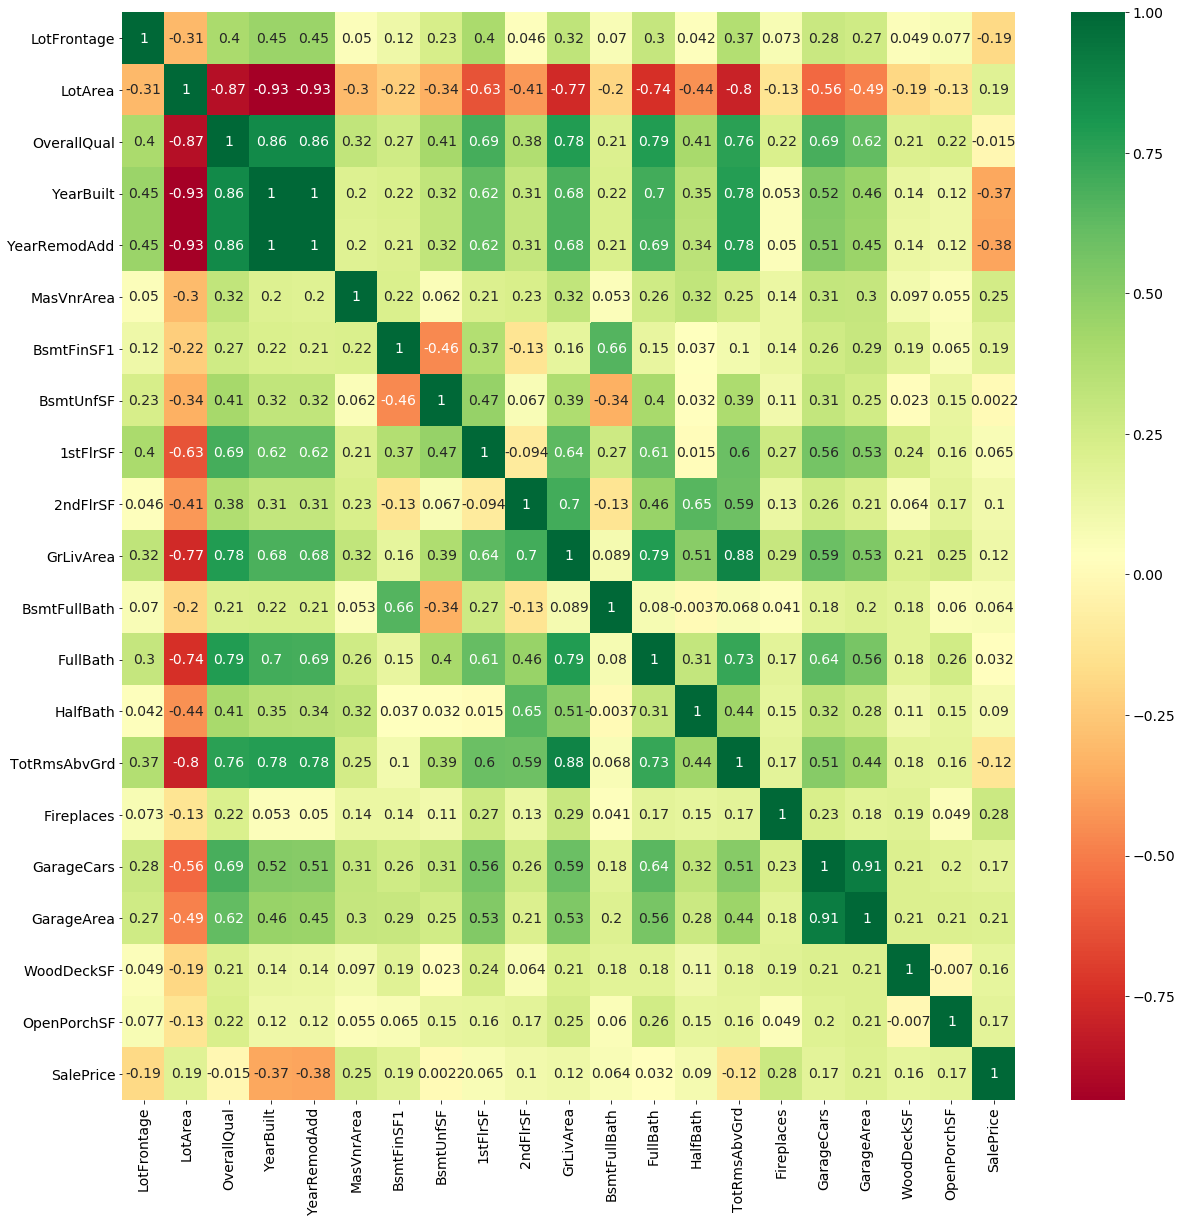

In [73]:
#get correlations of each features in dataset
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Feature selection using ExtraTreeClssifier


In [74]:
num=train_data.select_dtypes(exclude=['object']).columns
num

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')

[0.05909366 0.05614401 0.05738133 0.05414937 0.05690729 0.03643299
 0.04797605 0.05780062 0.05654064 0.03558953 0.06069411 0.03571777
 0.05952789 0.02914876 0.057672   0.04040491 0.05328719 0.0566295
 0.04377358 0.04512881]


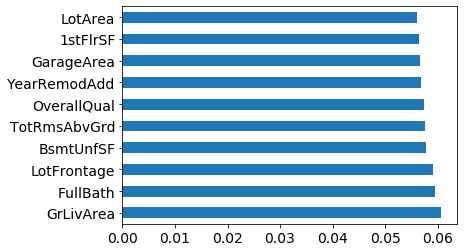

['GrLivArea',
 'FullBath',
 'LotFrontage',
 'BsmtUnfSF',
 'TotRmsAbvGrd',
 'OverallQual',
 'YearRemodAdd',
 'GarageArea',
 '1stFlrSF',
 'LotArea',
 'YearBuilt',
 'GarageCars',
 'BsmtFinSF1',
 'OpenPorchSF',
 'WoodDeckSF',
 'Fireplaces',
 'MasVnrArea',
 'BsmtFullBath',
 '2ndFlrSF',
 'HalfBath']

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
X = train_data[num].drop(['SalePrice'],axis=1)  #independent columns
y = train_data['SalePrice']   #target column i.e price range

model = ExtraTreesClassifier(n_estimators=20)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

topF=pd.DataFrame(feat_importances,columns=['result']).sort_values(by='result',ascending=False).head(20)
topF=list(topF.index)
topF

#### Feature selection usnig Chi-Squared
This is a filter-based method.
In this method, we calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values.

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = train_data[num].drop(['SalePrice'],axis=1)  #independent columns
y = train_data['SalePrice']   #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

           Specs      Score
9       2ndFlrSF  42.572938
6     BsmtFinSF1  33.838419
7      BsmtUnfSF  31.143683
4   YearRemodAdd  27.670844
3      YearBuilt  27.360428
5     MasVnrArea  24.290069
10     GrLivArea  15.388962
18    WoodDeckSF  11.810666
8       1stFlrSF  11.053625
17    GarageArea   9.010699
19   OpenPorchSF   8.039439
1        LotArea   6.016700
0    LotFrontage   0.444123
2    OverallQual   0.079132
13      HalfBath   0.066674
14  TotRmsAbvGrd   0.061772
11  BsmtFullBath   0.051077
15    Fireplaces   0.050466
16    GarageCars   0.036743
12      FullBath   0.027890


### one hotencoder for categorical features uning get_dummise method

In [77]:
cols=train_data.columns

In [78]:
#numF=train_data._get_numeric_data().columns

First we define the list of categorical features that we will want to process:


In [79]:
catF=list(set(cols) - set(numF))

We can really quickly build dummy features with pandas by calling the get_dummies function.
Let's create a new DataFrame for our processed data:

In [80]:
df_processed = pd.get_dummies(train_data, prefix_sep="__",columns=catF)

In [81]:
df_processed.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,LandSlope__Gtl,LandSlope__Mod,LandSlope__Sev,MasVnrType__BrkCmn,MasVnrType__BrkFace,MasVnrType__None,MasVnrType__Stone,Heating__Floor,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,Exterior2nd__AsbShng,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,LotShape__IR1,LotShape__IR2,LotShape__IR3,LotShape__Reg,Functional__Maj1,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sev,Functional__Typ,Street__Grvl,Street__Pave,BsmtFinType1__ALQ,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__Rec,BsmtFinType1__Unf,FireplaceQu__Ex,FireplaceQu__Fa,FireplaceQu__Gd,FireplaceQu__Po,FireplaceQu__TA,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,HeatingQC__Ex,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,LotConfig__Corner,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,Foundation__BrkTil,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,LandContour__Bnk,LandContour__HLS,LandContour__Low,LandContour__Lvl,Neighborhood__Blmngtn,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,GarageFinish__Fin,GarageFinish__RFn,GarageFinish__Unf,MSZoning__C (all),MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,RoofStyle__Flat,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,ExterQual__Ex,ExterQual__Fa,ExterQual__Gd,ExterQual__TA,CentralAir__N,CentralAir__Y,Condition1__Artery,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,BldgType__1Fam,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,GarageCond__Ex,GarageCond__Fa,GarageCond__Gd,GarageCond__Po,GarageCond__TA,Exterior1st__AsbShng,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Condition2__Artery,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,GarageQual__Ex,GarageQual__Fa,GarageQual__Gd,GarageQual__Po,GarageQual__TA,BsmtCond__Fa,BsmtCond__Gd,BsmtCond__Po,BsmtCond__TA,BsmtFinType2__ALQ,BsmtFinType2__BLQ,BsmtFinType2__GLQ,BsmtFinType2__LwQ,BsmtFinType2__Rec,BsmtFinType2__Unf,GarageType__2Types,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,BsmtQual__Ex,BsmtQ

That’s it for the training set part, now you have a DataFrame with one hot encoded features.
We will need to save a few things into variables to make sure that we build the exact same columns on the test dataset.
See how pandas created new columns with the following format: <column__value>.
Let’s create a list that looks for those new columns and store them in a new variable cat_dummies.

In [82]:
cat_dummies = [col for col in df_processed if "__" in col and col.split("__")[0] in catF]

In [83]:
cat_dummies

['LandSlope__Gtl',
 'LandSlope__Mod',
 'LandSlope__Sev',
 'MasVnrType__BrkCmn',
 'MasVnrType__BrkFace',
 'MasVnrType__None',
 'MasVnrType__Stone',
 'Heating__Floor',
 'Heating__GasA',
 'Heating__GasW',
 'Heating__Grav',
 'Heating__OthW',
 'Heating__Wall',
 'Exterior2nd__AsbShng',
 'Exterior2nd__AsphShn',
 'Exterior2nd__Brk Cmn',
 'Exterior2nd__BrkFace',
 'Exterior2nd__CBlock',
 'Exterior2nd__CmentBd',
 'Exterior2nd__HdBoard',
 'Exterior2nd__ImStucc',
 'Exterior2nd__MetalSd',
 'Exterior2nd__Other',
 'Exterior2nd__Plywood',
 'Exterior2nd__Stone',
 'Exterior2nd__Stucco',
 'Exterior2nd__VinylSd',
 'Exterior2nd__Wd Sdng',
 'Exterior2nd__Wd Shng',
 'LotShape__IR1',
 'LotShape__IR2',
 'LotShape__IR3',
 'LotShape__Reg',
 'Functional__Maj1',
 'Functional__Maj2',
 'Functional__Min1',
 'Functional__Min2',
 'Functional__Mod',
 'Functional__Sev',
 'Functional__Typ',
 'Street__Grvl',
 'Street__Pave',
 'BsmtFinType1__ALQ',
 'BsmtFinType1__BLQ',
 'BsmtFinType1__GLQ',
 'BsmtFinType1__LwQ',
 'BsmtFinTyp

Let’s also save the list of columns so we can enforce the order of columns later on.

In [84]:
processed_columns = list(df_processed.columns[:])

In [85]:
#processed_columns

Process our unseen (test) data!
Now let’s see how to ensure our test data has the same columns, first let’s call get_dummies on it:

In [86]:
df_test_processed = pd.get_dummies(test_data, prefix_sep="__", columns=catF)
df_test_processed=df_test_processed

In [87]:
df_test_processed.head()
#df_test_processed.shape

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,LandSlope__Gtl,LandSlope__Mod,LandSlope__Sev,MasVnrType__BrkCmn,MasVnrType__BrkFace,MasVnrType__None,MasVnrType__Stone,Heating__GasA,Heating__GasW,Heating__Grav,Heating__Wall,Exterior2nd__AsbShng,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,LotShape__IR1,LotShape__IR2,LotShape__IR3,LotShape__Reg,Functional__Maj1,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sev,Functional__Typ,Street__Grvl,Street__Pave,BsmtFinType1__ALQ,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__Rec,BsmtFinType1__Unf,FireplaceQu__Ex,FireplaceQu__Fa,FireplaceQu__Gd,FireplaceQu__Po,FireplaceQu__TA,RoofMatl__CompShg,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,HeatingQC__Ex,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,LotConfig__Corner,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,Foundation__BrkTil,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,LandContour__Bnk,LandContour__HLS,LandContour__Low,LandContour__Lvl,Neighborhood__Blmngtn,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,GarageFinish__Fin,GarageFinish__RFn,GarageFinish__Unf,MSZoning__C (all),MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,RoofStyle__Flat,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,ExterQual__Ex,ExterQual__Fa,ExterQual__Gd,ExterQual__TA,CentralAir__N,CentralAir__Y,Condition1__Artery,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,BldgType__1Fam,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,Electrical__SBrkr,GarageCond__Ex,GarageCond__Fa,GarageCond__Gd,GarageCond__Po,GarageCond__TA,Exterior1st__AsbShng,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Condition2__Artery,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,GarageQual__Fa,GarageQual__Gd,GarageQual__Po,GarageQual__TA,BsmtCond__Fa,BsmtCond__Gd,BsmtCond__Po,BsmtCond__TA,BsmtFinType2__ALQ,BsmtFinType2__BLQ,BsmtFinType2__GLQ,BsmtFinType2__LwQ,BsmtFinType2__Rec,BsmtFinType2__Unf,GarageType__2Types,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,BsmtQual__Ex,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__TA,BsmtExposure__Av,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__No,PavedDrive__N,PavedDrive__P,PavedDrive__Y,Utilities__AllPub,HouseStyle__1.5Fin,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle

As expected we have new columns  and missing ones. But we can easily clean it up!

In [88]:
# Remove additional columns
for col in df_test_processed.columns:
    if ("__" in col) and (col.split("__")[0] in catF) and col not in cat_dummies:
        print("Removing additional feature {}".format(col))
        df_test_processed.drop(col, axis=1, inplace=True)

Now we need to add the missing columns.
We can set all missing columns to a vector of 0s since those values did not appear in the test data.

In [89]:
for col in cat_dummies:
    if col not in df_test_processed.columns:
        print("Adding missing feature {}".format(col))
        df_test_processed[col] = 0

Adding missing feature Heating__Floor
Adding missing feature Heating__OthW
Adding missing feature Exterior2nd__Other
Adding missing feature RoofMatl__Membran
Adding missing feature RoofMatl__Metal
Adding missing feature RoofMatl__Roll
Adding missing feature Electrical__Mix
Adding missing feature Exterior1st__ImStucc
Adding missing feature Exterior1st__Stone
Adding missing feature Condition2__RRAe
Adding missing feature Condition2__RRAn
Adding missing feature Condition2__RRNn
Adding missing feature GarageQual__Ex
Adding missing feature Utilities__NoSeWa
Adding missing feature HouseStyle__2.5Fin


That’s it, we now have the same features.
Note that the order of the columns isn’t kept though,
if you need to reorder the columns,
reuse the list of processed columns we saved earlier:

In [90]:
#df_processed=df_processed.loc[:,~df_processed.columns.duplicated()]

# Modeling 

## Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [92]:
X=df_processed.drop('SalePrice', axis=1)
y=df_processed['SalePrice']
feature_cols = list(X.columns)

In [93]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

##### Now we're gonna tune the hyper parameters for our Random Forest using a grid search

In [94]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [70,80, 90, 100, 110],
    'max_features': [2, 3,10],
    'min_samples_leaf': [3, 4, 5,10],
    'min_samples_split': [6,8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [95]:
# Fit the grid search to the data
grid_search.fit(X_train_full,y_train )
grid_search.best_params_

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  5.4min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 300}

#### Create our model and fit it to the data

In [94]:
#create a Gaussian Classifier
clf=RandomForestRegressor(bootstrap=True,max_depth=100,max_features=10,min_samples_leaf=3,min_samples_split=6,n_estimators=300)
#train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_full,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [95]:
mae = mean_absolute_error(y_valid, clf.predict(X_valid_full))
print("MAE:" ,mae)

MAE: 26071.533506267446


In [96]:
y_pred=clf.predict(df_test_processed)

### Use XGBoost

In [97]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [98]:
XGB = XGBRegressor(colsample_bytree=0.3,
                 gamma=3,                 
                 learning_rate=0.1,
                 max_depth=3,
                 min_child_weight=2,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.8,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

XGB.fit(X_train_full,y_train)


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=3, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.8,
             reg_lambda=0.45, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method=None, validate_parameters=False, verbosity=None)

In [99]:

mae = mean_absolute_error(y_valid, XGB.predict(X_valid_full))
print("MAE:" ,mae)


MAE: 18545.874598672945


In [100]:
XGB.fit(X,y)


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=3, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.8,
             reg_lambda=0.45, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method=None, validate_parameters=False, verbosity=None)

In [101]:
y_pred=XGB.predict(df_test_processed[feature_cols])

### XGBoost 2
tuning hyper parameters using a gridSearch

In [135]:
# Create the parameter grid based on the results of random search 
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

#Create a base model           
estimator = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)
# Instantiate the grid search model
gsearch = GridSearchCV(estimator = estimator, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')


In [ ]:
gsearch.fit(X_train_full,y_train)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


/home/mahmoud/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed: 143.7min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed: 153.6min


In [102]:
XGB1 = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

XGB1.fit(X_train_full,y_train)


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.75,
             reg_lambda=0.45, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method=None, validate_parameters=False, verbosity=None)

In [103]:

mae = mean_absolute_error(y_valid, XGB1.predict(X_valid_full))
print("MAE:" ,mae)


MAE: 17905.24202696918


In [104]:
XGB1.fit(X,y)


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.75,
             reg_lambda=0.45, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method=None, validate_parameters=False, verbosity=None)

In [105]:
y_pred=XGB1.predict(df_test_processed[feature_cols])

## Create sample submission file and submit

In [106]:
pred=pd.DataFrame(y_pred)
pred.head()

,0
0,119114.578125
1,164665.234375
2,166424.765625
3,189936.000000
4,187225.250000


In [107]:
sub_df=pd.read_csv('sample_submission.csv')
dataset=pd.concat([sub_df['Id'],pred],axis=1)

In [108]:
dataset.columns=['Id','SalePrice']


In [110]:
dataset.head()

,Id,SalePrice
0,1461,119114.578125
1,1462,164665.234375
2,1463,166424.765625
3,1464,189936.000000
4,1465,187225.250000


In [111]:
dataset.to_csv('SAmple Submission.csv',index=False)